# Plot timeseries of noncompliance and vertical grid information

In [1]:
import sys
import os
import xarray
import openpyxl
import contextily as cx 
import yaml
import numpy as np
import pandas
import pathlib
import time
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl

In [2]:
case="whidbey"
noncompliance=-0.25 
human_allowance=-0.2 
model_var="DOXG" 
run_file = f"/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/{case}/DOXG/wqm_baseline/wc/daily_min_DOXG_wc.nc"
with open(f'../etc/SSM_config_{case}.yaml', 'r') as file:
        ssm = yaml.safe_load(file)
        # get shapefile path    
        shp = ssm['paths']['shapefile']
        
#model_var="DOXG"
plt.rc('axes', titlesize=16)     # fontsize of the axes title

# Define dimension sizes and load shapefile
gdf = gpd.read_file(shp)
gdf = gdf.rename(columns={'region_inf':'Regions'})
regions = gdf[['node_id','Regions']].groupby(
    'Regions').count().index.to_list()
regions.remove('Other')
output_directory = pathlib.Path('/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/reports')
print('output_directory: ', output_directory)

output_directory:  /mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/reports


# 2014 Area non-compliant and percent volume non-compliant

In [37]:
### PERCENT VOLUME
volume_file = "whidbey_baseline_wc_noncompliant_m0p25_TS_byRegion.xlsx"
input_dir = pathlib.Path("/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/whidbey/spreadsheets")
vnc_2014=pandas.read_excel(input_dir/volume_file).set_index("Unnamed: 0")

###. AREA
area_file = "whidbey_baseline_wc_noncompliant_AREA_m0p25_TS_byRegion.xlsx"
input_dir = pathlib.Path("/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/whidbey/spreadsheets")
anc_2014=pandas.read_excel(input_dir/area_file).set_index("Unnamed: 0")

In [4]:
mpl.rc('font', size=11)
# some of the following may be repetetive but can also be set relative to the font value above 
#    (eg "xx-small, x-small,small, medium, large, x-large, xx-large, larger, or smaller"; see link above for details)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=16)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=16)
mpl.rc('text', usetex=False)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

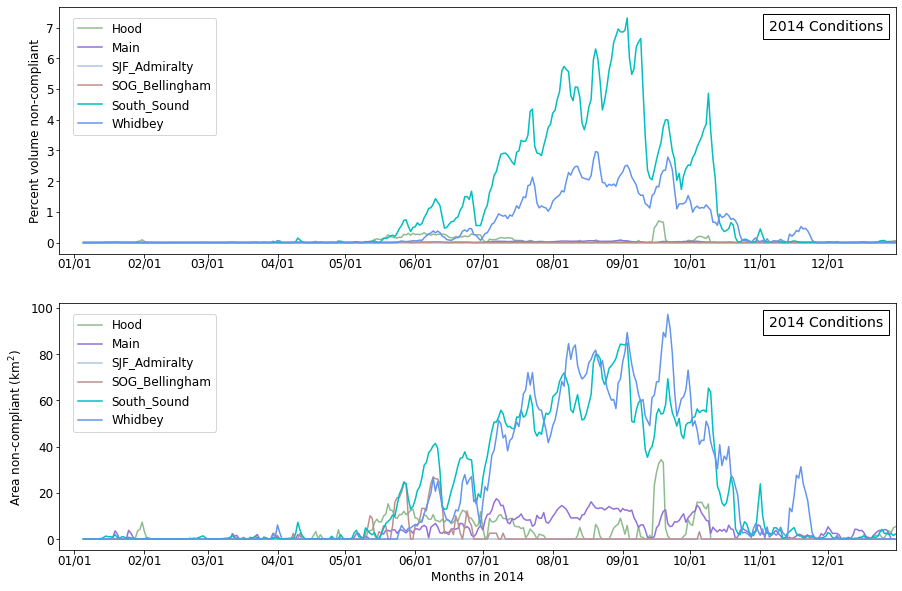

In [33]:
time=np.arange(
    np.datetime64('2014-01-05'), np.datetime64('2015-01-01')
)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10),
                   gridspec_kw={
                       'width_ratios': [1],
                       'height_ratios': [1,1],
                   'wspace': 0.1,
                   'hspace': 0.2})

for region in [*anc_2014]:
    ax[0].plot(time, vnc_2014[region], color=ssm['region']['colors'][region],label=region)
    ax[1].plot(time, anc_2014[region]*1e-6, color=ssm['region']['colors'][region],label=region)
for idx in [0,1]:
    ax[idx].set_xlim(np.datetime64('2013-12-25'), np.datetime64('2014-12-31'))
    # set x-ticklabels to the 15th day of the month 
    ax[idx].xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=15))
    # set x-ticklabels to the first day of the month
    ax[idx].xaxis.set_major_locator(mpl.dates.MonthLocator())
    ax[idx].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m/%d'))  
    ax[idx].legend(bbox_to_anchor=(0.01, .98), loc='upper left')
    anchored_text = AnchoredText(
        "2014 Conditions", 
        loc='upper right',
        frameon=True,
        prop=dict(color="black",ha="right",fontsize=14)
    )
    ax[idx].add_artist(anchored_text) 
ax[0].set_ylabel('Percent volume non-compliant')
ax[1].set_ylabel(r'Area non-compliant (km$^2$)')
ax[1].set_xlabel('Months in 2014')
plt.savefig(output_directory/f"Area_PercentVolume_Noncompliance_TS_baseline.png", bbox_inches="tight")

# Plot percent volume and area non-compliant for each scenario

In [12]:
tag_list = [*ssm['run_information']['run_tag']['whidbey']]
tag_list.remove('wqm_baseline')
tag_list.remove('wqm_reference')
tag_list

['3b', '3e', '3f', '3g', '3h', '3i', '3j', '3k', '3c', '3l', '3m']

In [ ]:
for region in [*anc]:
    print(region)
    print(min(vnc[region]), max(vnc[region]))
    print(min(anc[region]*1e-6), max(anc[region]*1e-6))

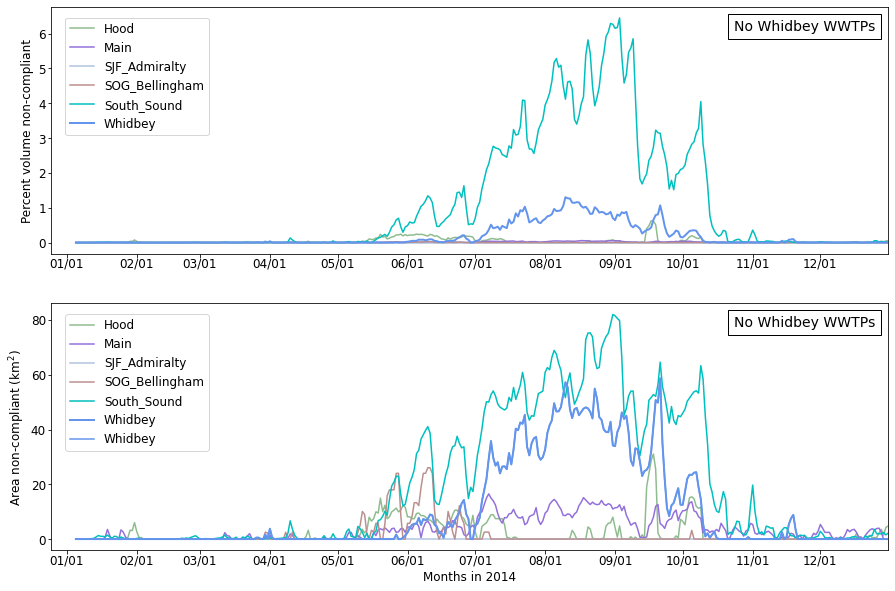

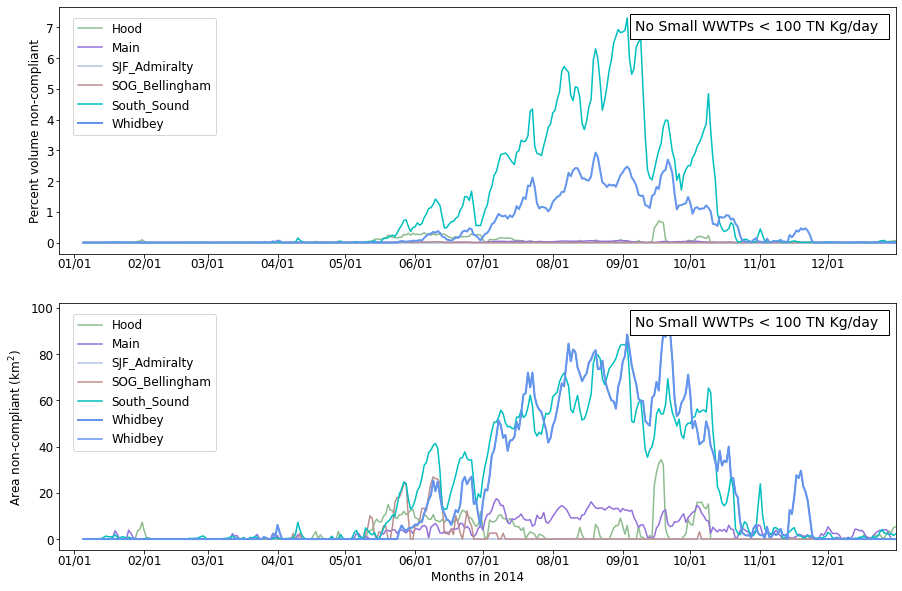

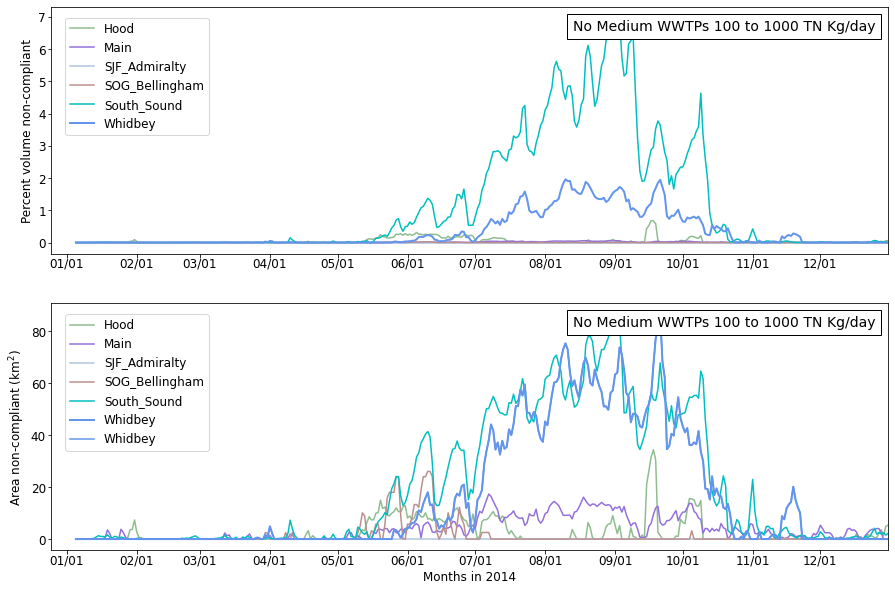

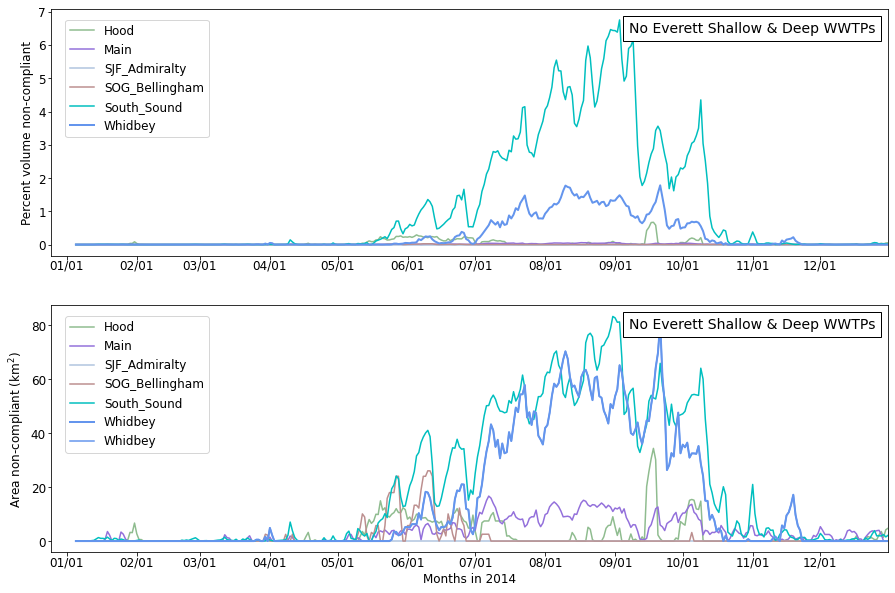

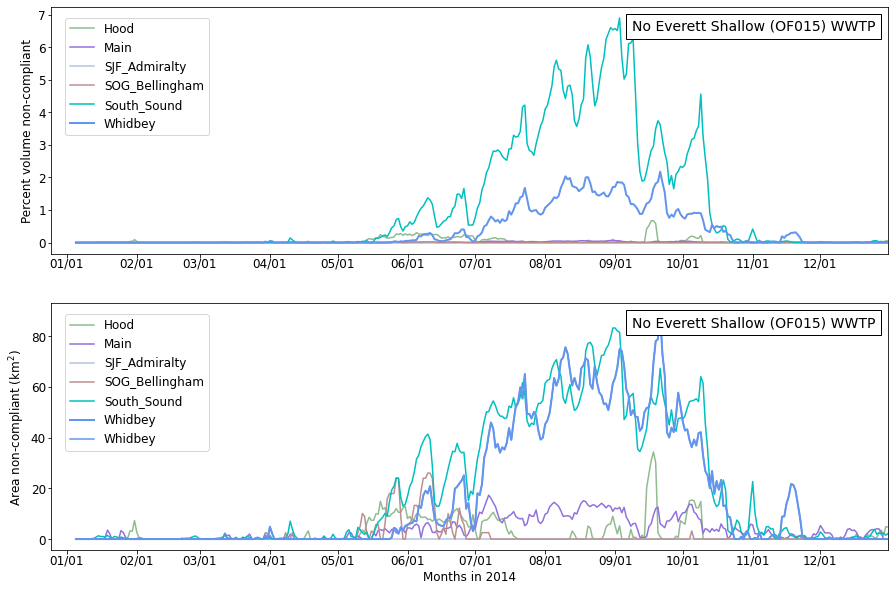

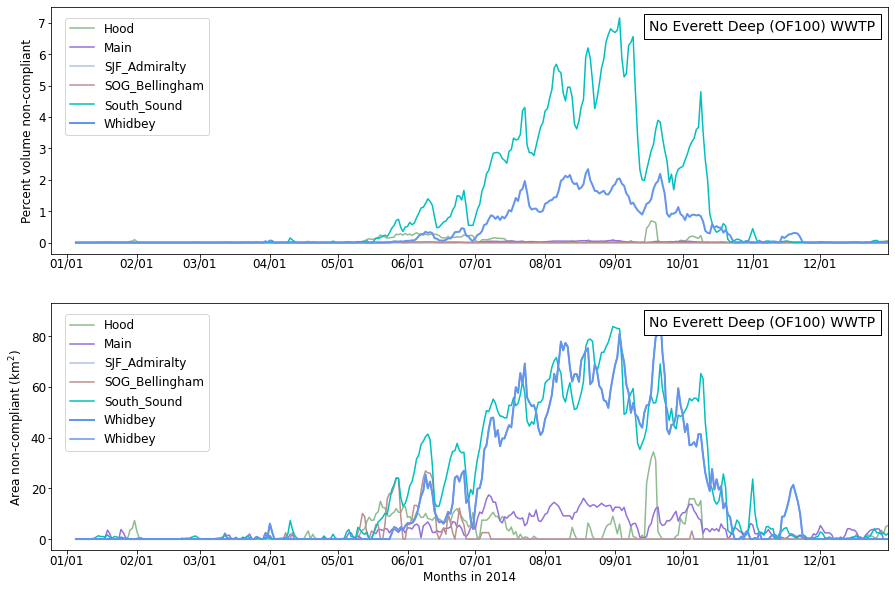

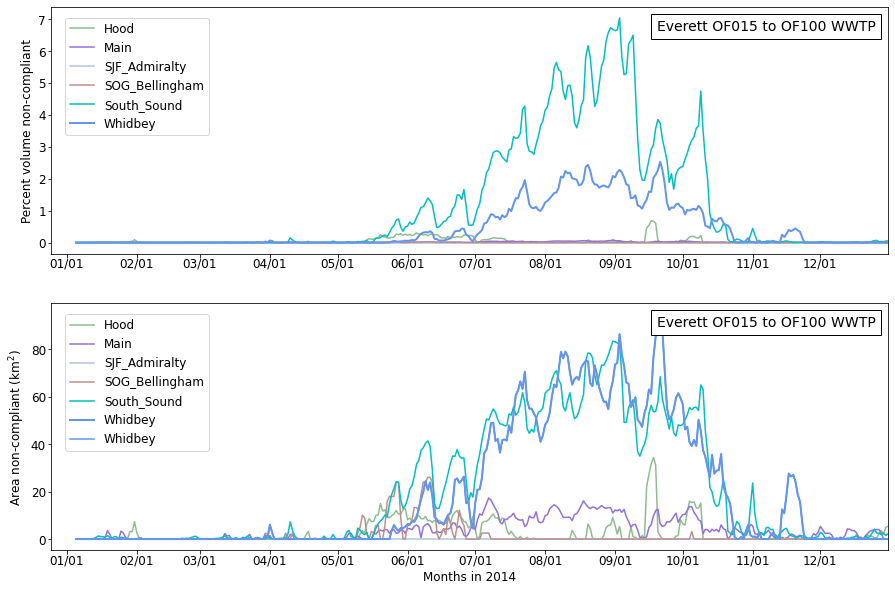

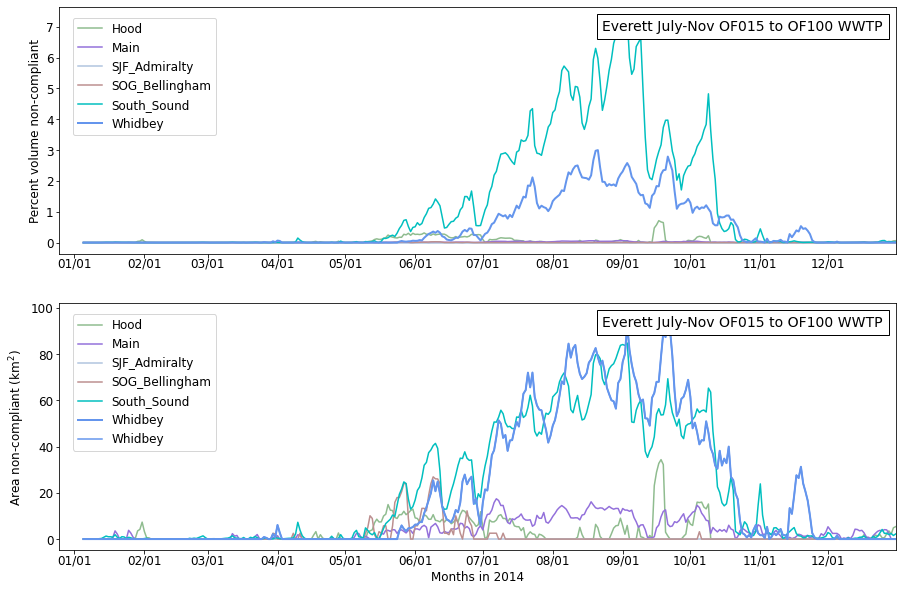

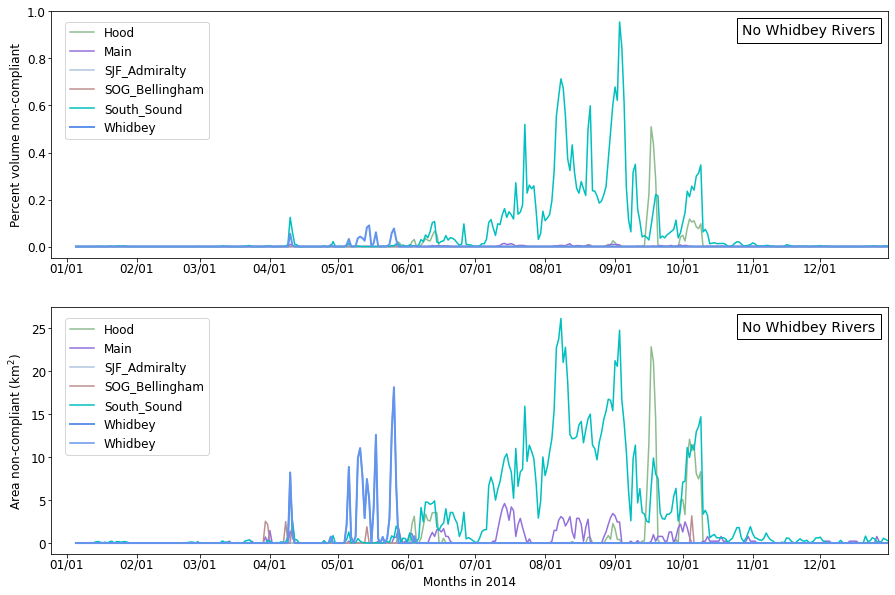

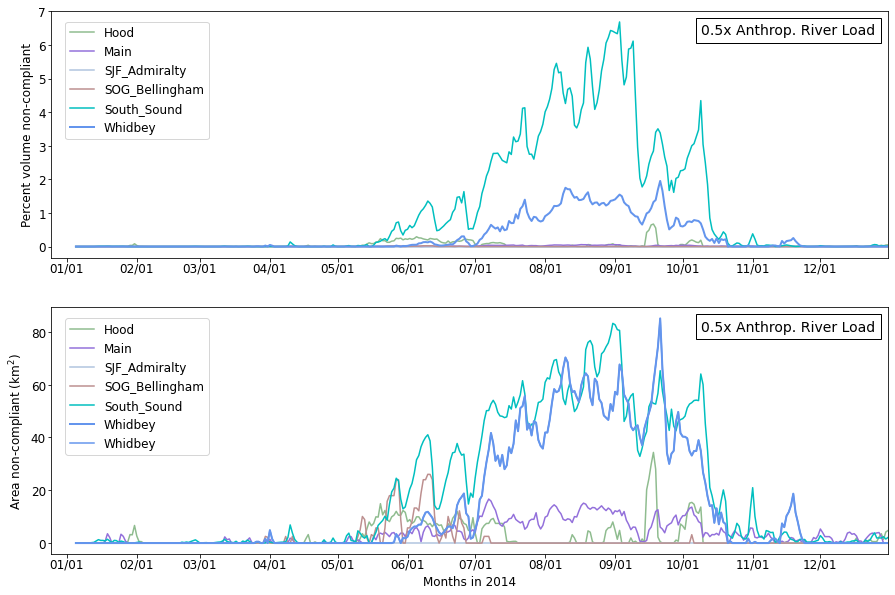

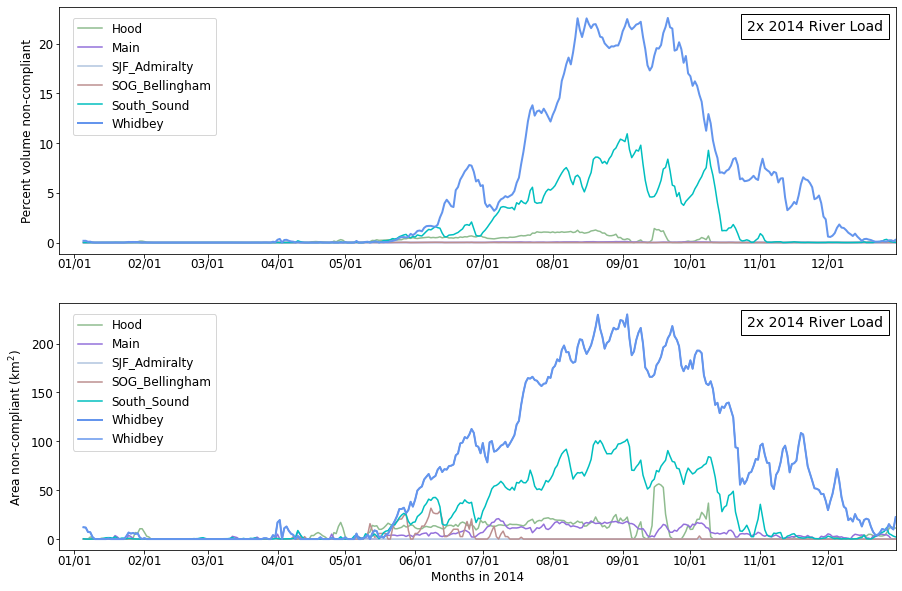

In [36]:
for scenario in tag_list:
    ### PERCENT VOLUME
    volume_file = f"whidbey_{ssm['run_information']['run_tag']['whidbey'][scenario]}_wc_noncompliant_m0p25_TS_byRegion.xlsx"
    input_dir = pathlib.Path("/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/whidbey/spreadsheets")
    vnc=pandas.read_excel(input_dir/volume_file).set_index("Unnamed: 0")

    ###. AREA
    area_file = f"whidbey_{ssm['run_information']['run_tag']['whidbey'][scenario]}_wc_noncompliant_AREA_m0p25_TS_byRegion.xlsx"
    input_dir = pathlib.Path("/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/whidbey/spreadsheets")
    anc=pandas.read_excel(input_dir/area_file).set_index("Unnamed: 0")

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10),
                       gridspec_kw={
                           'width_ratios': [1],
                           'height_ratios': [1,1],
                       'wspace': 0.1,
                       'hspace': 0.2})

    for region in [*anc]:
        if region=='Whidbey':
            ax[0].plot(time, vnc[region], color=ssm['region']['colors'][region],label=region, linewidth=2)
            ax[1].plot(time, anc[region]*1e-6, color=ssm['region']['colors'][region],label=region, linewidth=2)
        else:
            ax[0].plot(time, vnc[region], color=ssm['region']['colors'][region],label=region)
        ax[1].plot(time, anc[region]*1e-6, color=ssm['region']['colors'][region],label=region)
    for idx in [0,1]:
        ax[idx].set_xlim(np.datetime64('2013-12-25'), np.datetime64('2014-12-31'))
        # set x-ticklabels to the 15th day of the month 
        ax[idx].xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=15))
        # set x-ticklabels to the first day of the month
        ax[idx].xaxis.set_major_locator(mpl.dates.MonthLocator())
        ax[idx].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m/%d'))  
        ax[idx].legend(bbox_to_anchor=(0.01, .98), loc='upper left')
        anchored_text = AnchoredText(
            ssm['run_information']['run_description_short']['whidbey'][scenario], 
            loc='upper right',
            frameon=True,
            prop=dict(color="black",ha="right",fontsize=14)
        )
        ax[idx].add_artist(anchored_text) 
    ax[0].set_ylabel('Percent volume non-compliant')
    ax[1].set_ylabel(r'Area non-compliant (km$^2$)')
    ax[1].set_xlabel('Months in 2014')
    plt.savefig(output_directory/f"Area_PercentVolume_Noncompliance_TS_{scenario}.png", bbox_inches="tight")

# Difference plots

In [44]:
min(vnc['Hood']-vnc_2014['Hood'])

0.0

In [51]:
areamin={}
areamax={}
volmin={}
volmax={}
for region in [*anc]:
    print(region)
    volmin[region]=min(vnc[region]-vnc_2014[region])
    volmax[region]=max(vnc[region]-vnc_2014[region])
    areamin[region]=min(anc[region]*1e-6-anc_2014[region]*1e-6) 
    areamax[region]=max(anc[region]*1e-6-anc_2014[region]*1e-6)
print(pandas.DataFrame(volmin,index=['min']))
print(pandas.DataFrame(volmax,index=['max']))
print(pandas.DataFrame(areamin,index=['min']))
print(pandas.DataFrame(areamax,index=['max']))

Hood
Main
SJF_Admiralty
SOG_Bellingham
South_Sound
Whidbey
     Hood  Main  SJF_Admiralty  SOG_Bellingham  South_Sound  Whidbey
min   0.0   0.0            0.0             0.0    -0.001327      0.0
         Hood      Main  SJF_Admiralty  SOG_Bellingham  South_Sound    Whidbey
max  1.209064  0.066589       0.007071        0.016329     4.416015  20.667354
     Hood  Main  SJF_Admiralty  SOG_Bellingham  South_Sound  Whidbey
min   0.0   0.0            0.0             0.0    -0.232757      0.0
          Hood      Main  SJF_Admiralty  SOG_Bellingham  South_Sound  \
max  30.008998  7.684545       3.691736       14.832316    27.959653   

        Whidbey  
max  158.013342  


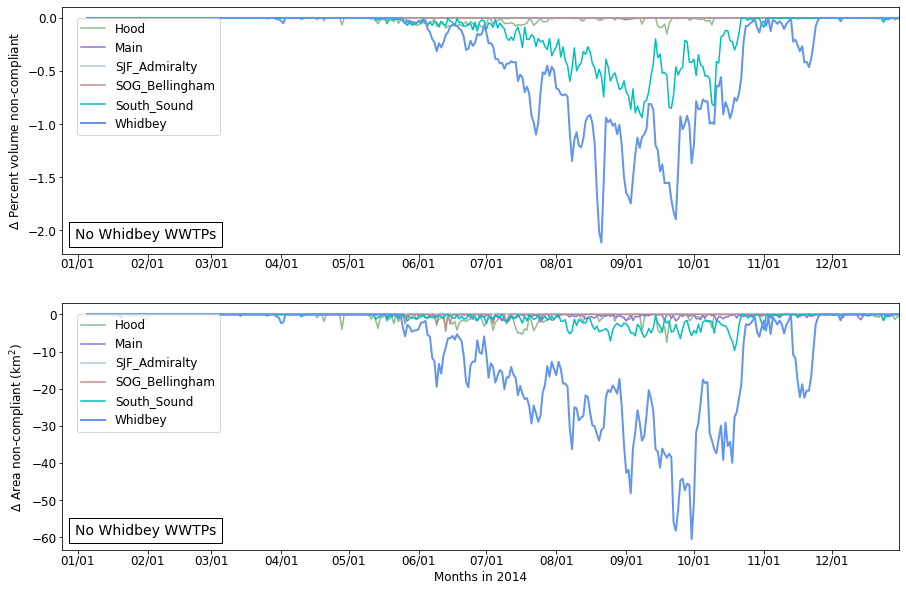

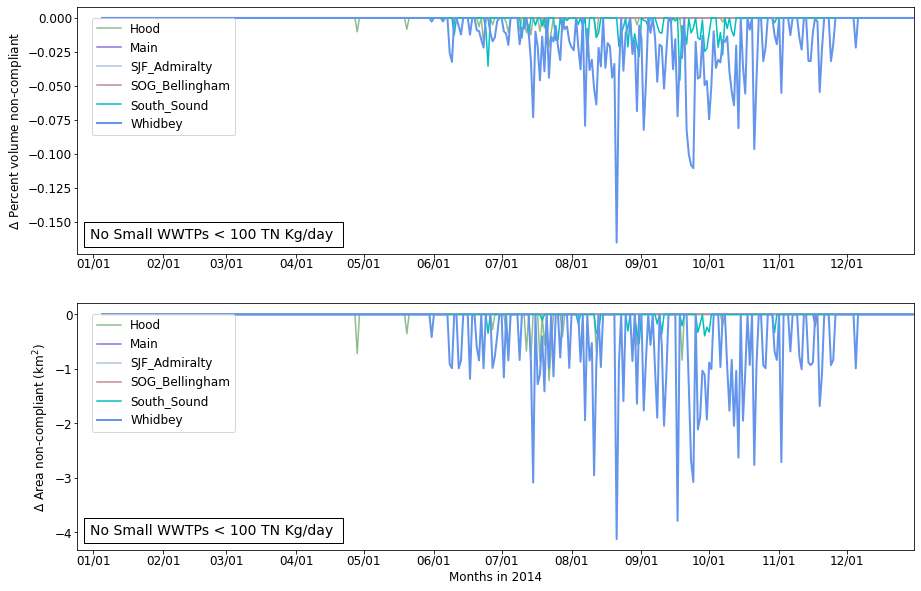

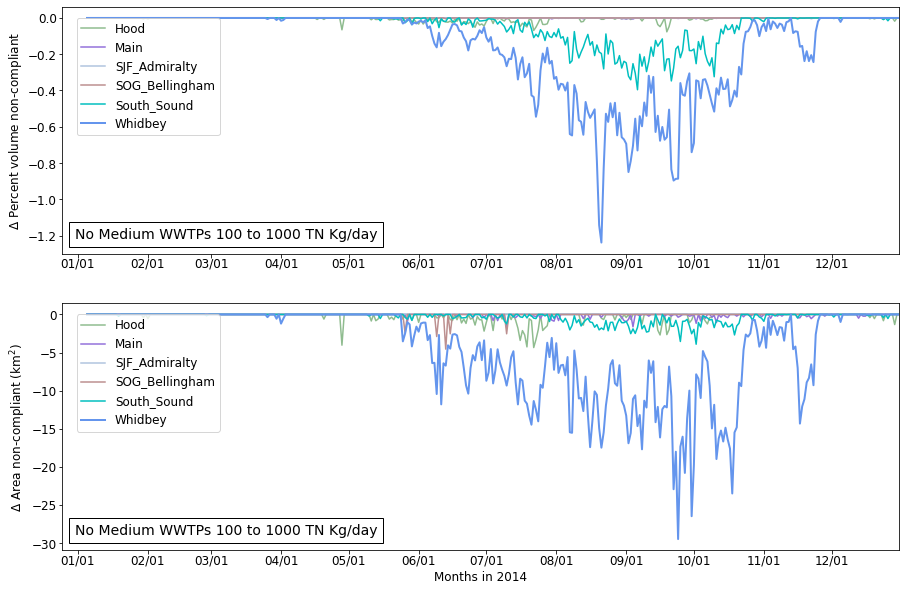

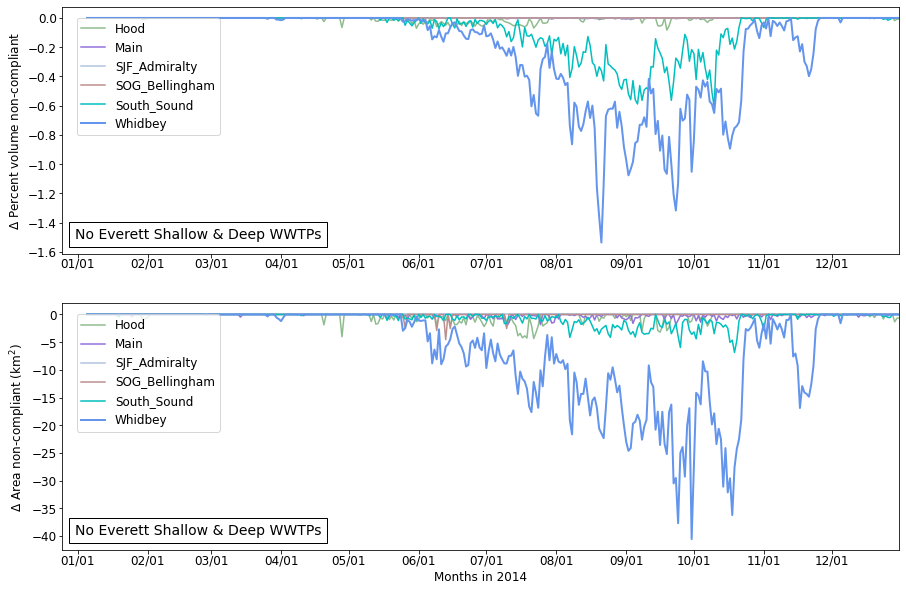

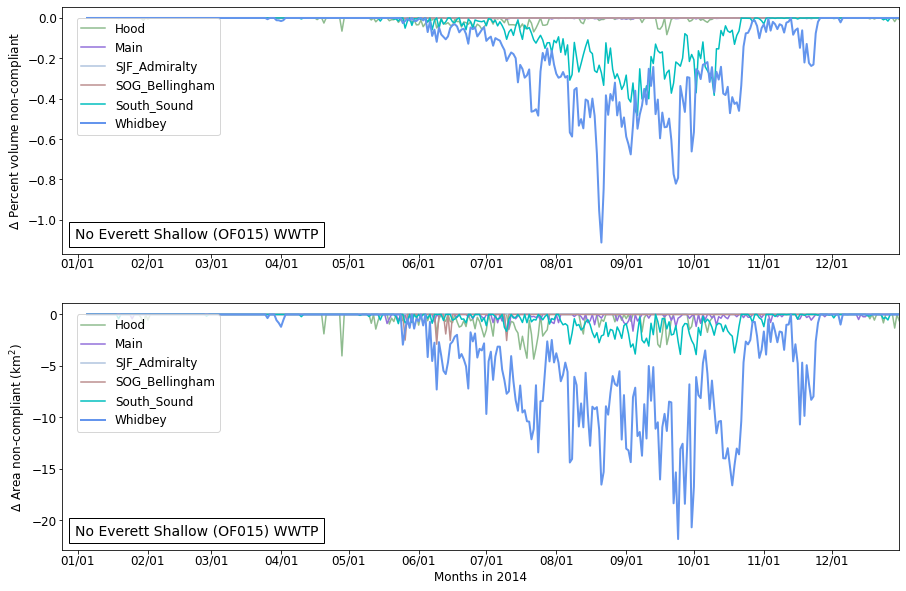

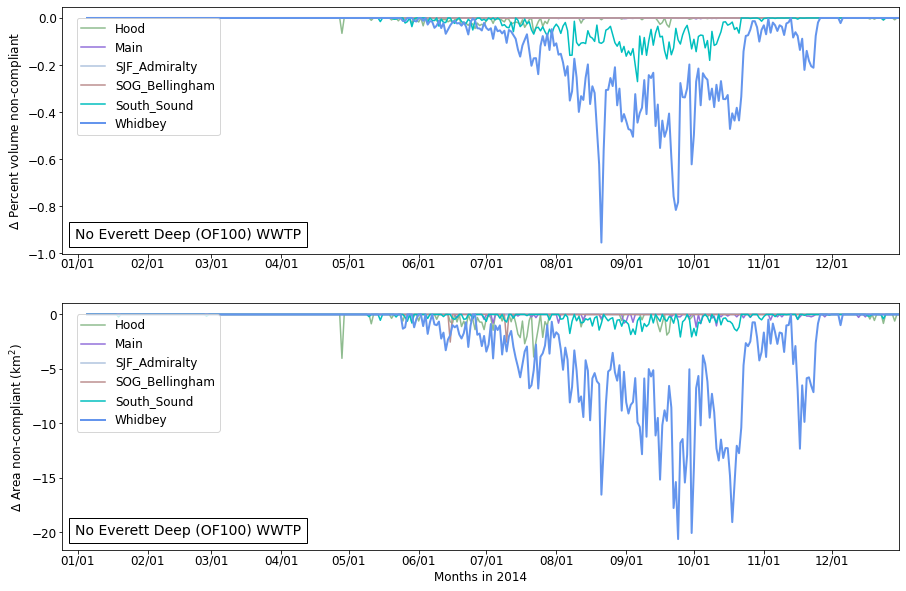

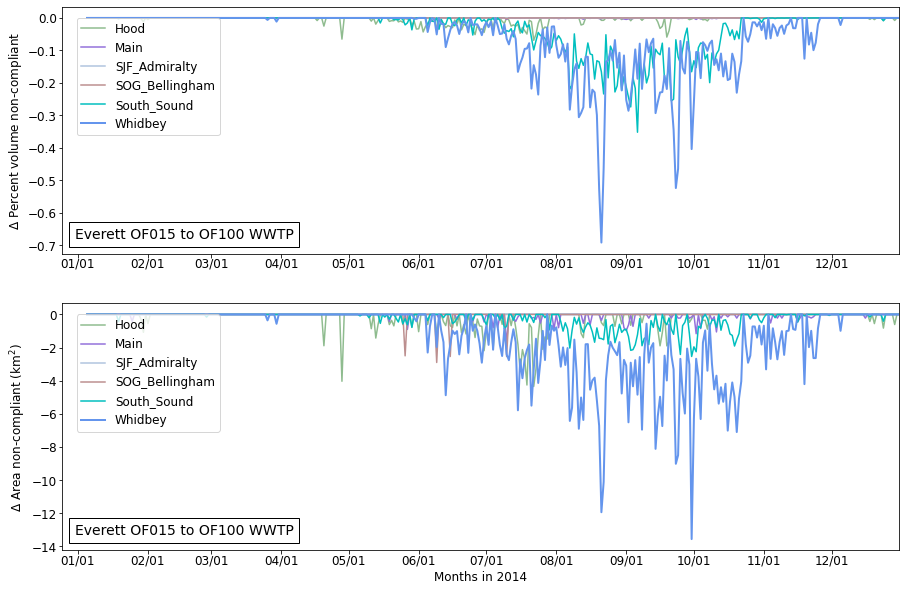

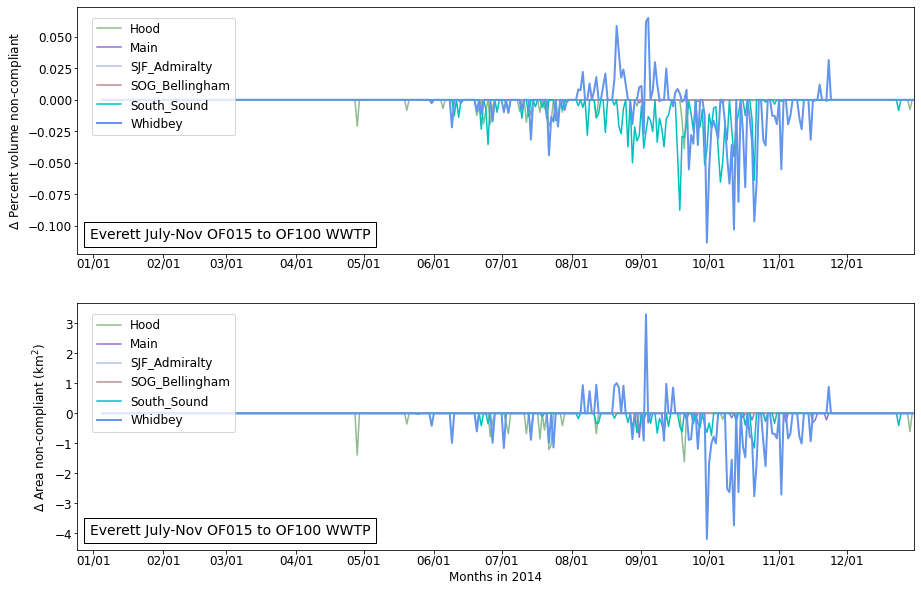

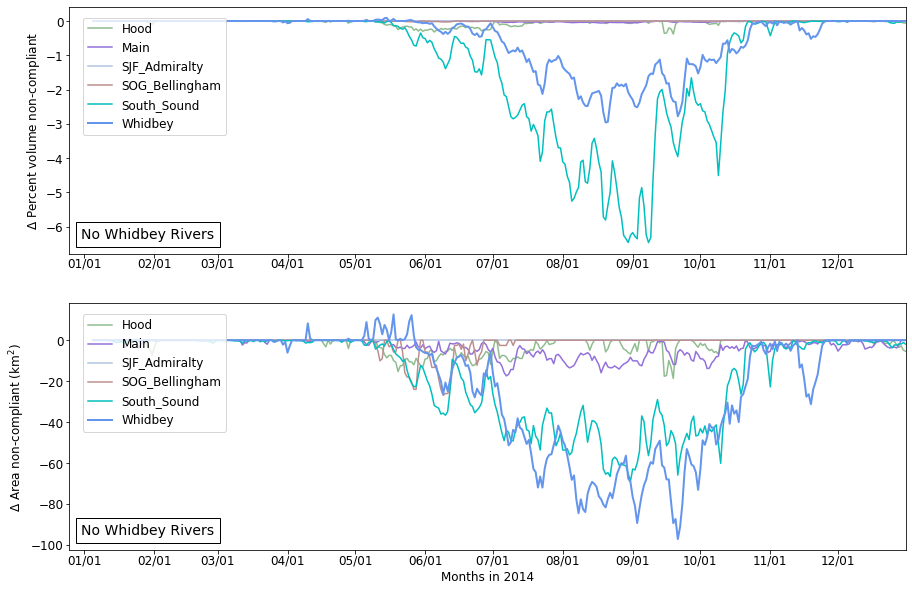

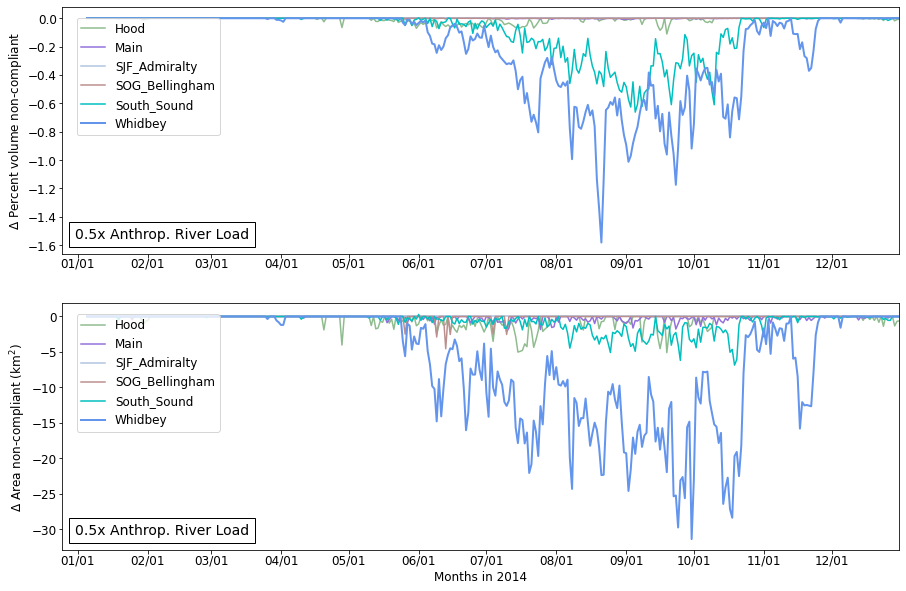

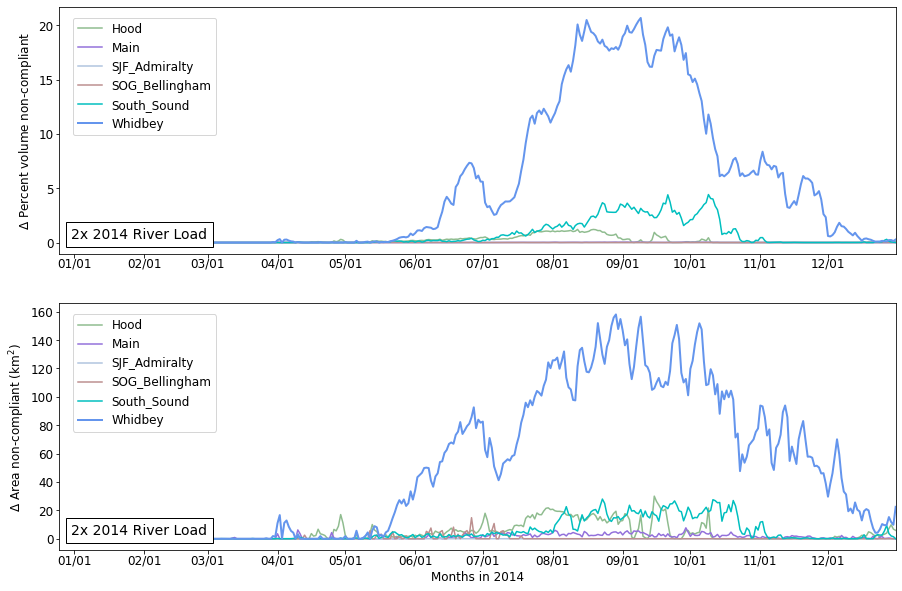

In [53]:
for scenario in tag_list:
    ### PERCENT VOLUME
    volume_file = f"whidbey_{ssm['run_information']['run_tag']['whidbey'][scenario]}_wc_noncompliant_m0p25_TS_byRegion.xlsx"
    input_dir = pathlib.Path("/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/whidbey/spreadsheets")
    vnc=pandas.read_excel(input_dir/volume_file).set_index("Unnamed: 0")

    ###. AREA
    area_file = f"whidbey_{ssm['run_information']['run_tag']['whidbey'][scenario]}_wc_noncompliant_AREA_m0p25_TS_byRegion.xlsx"
    input_dir = pathlib.Path("/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/whidbey/spreadsheets")
    anc=pandas.read_excel(input_dir/area_file).set_index("Unnamed: 0")

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10),
                       gridspec_kw={
                           'width_ratios': [1],
                           'height_ratios': [1,1],
                       'wspace': 0.1,
                       'hspace': 0.2})

    for region in [*anc]:
        if region=='Whidbey':
            ax[0].plot(time, vnc[region]-vnc_2014[region], color=ssm['region']['colors'][region],label=region, linewidth=2)
            ax[1].plot(time, anc[region]*1e-6-anc_2014[region]*1e-6, color=ssm['region']['colors'][region],label=region, linewidth=2)
        else:
            ax[0].plot(time, vnc[region]-vnc_2014[region], color=ssm['region']['colors'][region],label=region)
            ax[1].plot(time, anc[region]*1e-6-anc_2014[region]*1e-6, color=ssm['region']['colors'][region],label=region)
    for idx in [0,1]:
        ax[idx].set_xlim(np.datetime64('2013-12-25'), np.datetime64('2014-12-31'))
        # set x-ticklabels to the 15th day of the month 
        ax[idx].xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=15))
        # set x-ticklabels to the first day of the month
        ax[idx].xaxis.set_major_locator(mpl.dates.MonthLocator())
        ax[idx].xaxis.set_major_formatter(mpl.dates.DateFormatter('%m/%d'))  
        ax[idx].legend(bbox_to_anchor=(0.01, .98), loc='upper left')
        anchored_text = AnchoredText(
            ssm['run_information']['run_description_short']['whidbey'][scenario], 
            loc='lower left',
            frameon=True,
            prop=dict(color="black",ha="right",fontsize=14)
        )
        ax[idx].add_artist(anchored_text) 
    ax[0].set_ylabel(r'$\Delta$ Percent volume non-compliant')
    ax[1].set_ylabel(r'$\Delta$ Area non-compliant (km$^2$)')
    ax[1].set_xlabel('Months in 2014')
    plt.savefig(output_directory/f"Delta_Area_PercentVolume_Noncompliance_TS_{scenario}.png", bbox_inches="tight")

# Average depths 

In [7]:
MeanDepth_dict={}
MedianCellArea_dict={}
depth = np.asarray(gdf.depth)
area = np.asarray(gdf.AREA)
for region in regions: 
    idx = ((gdf['Regions']==region) &
            (gdf['included_i']==1))
    RegionDepth = depth[
        (gdf['Regions']==region) &
        (gdf['included_i']==1)
    ]
    CellArea = area[
        (gdf['Regions']==region) &
        (gdf['included_i']==1)
    ]
    weightedDepth = np.sum(1000*RegionDepth*CellArea)/sum(CellArea)
    MeanDepth_dict[region]=weightedDepth
    MedianCellArea_dict[region]=np.median(CellArea)
MeanDepth_df = pandas.DataFrame(MeanDepth_dict,index=['depth'])
MedianCellArea_df = pandas.DataFrame(MedianCellArea_dict,index=['area'])

In [8]:
MeanDepth_df

,Hood,Main,SJF_Admiralty,SOG_Bellingham,South_Sound,Whidbey
depth,68.699809,111.369757,95.686086,83.85308,40.945324,59.72374


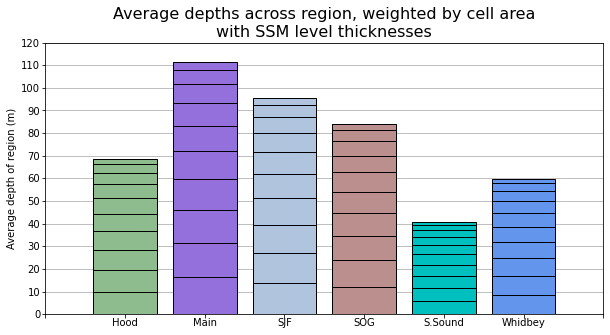

In [10]:
color_list = [ssm['region']['colors'][region] for region in [*ssm['region']['colors']] if region != "ALL_REGIONS"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5),
                   gridspec_kw={
                       'width_ratios': [1],
                       'height_ratios': [1],
                   'wspace': 0.4,
                   'hspace': 0.2})
data_x = [0,1,2,3,4,5]
data_y = [MeanDepth_df[region].item() for region in [*MeanDepth_df]]
ax.bar(data_x, data_y, color=color_list,zorder=2)
# add depth levels
for region_index in data_x:
    level_thickness=ssm['siglev_diff']*np.array(data_y[region_index])/100
    level_thickness_flip = np.array([level_thickness[i] for i in [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]])
    for idx,height in enumerate(level_thickness_flip):
        ax.bar(data_x[region_index], height+sum(level_thickness_flip[:idx]), fill=False,edgecolor="black",zorder=2)
ax.set_ylabel("Average depth of region (m)")
#ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Create x-axis labels
labels = ['','Hood', 'Main', 'SJF', 'SOG', 'S.Sound', 'Whidbey','']
#ax.set_xticks(plot_df.index.to_list())
# ax.set_xticklabels(('$a$', '$valx$', '$b$'))
w = ax.get_xticks()
ax.set_xticks(w)
ax.set_xticklabels(labels)
ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
ax.yaxis.grid(True, which='major',zorder=0)
#ax.grid(zorder=0)
ax.set_title("Average depths across region, weighted by cell area\nwith SSM level thicknesses")
plt.savefig(output_directory/"Region_avg_depths_wLevelThickness.png", bbox_inches="tight")
plt.show()

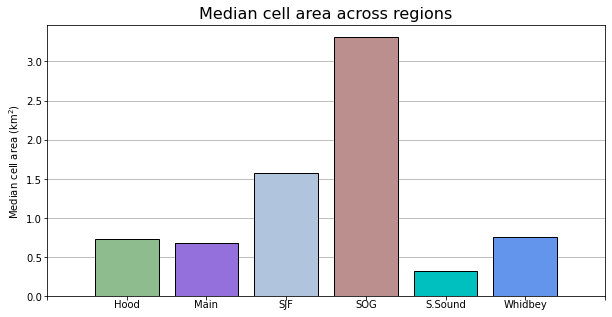

In [13]:
color_list = [ssm['region']['colors'][region] for region in [*ssm['region']['colors']] if region != "ALL_REGIONS"]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5),
                   gridspec_kw={
                       'width_ratios': [1],
                       'height_ratios': [1],
                   'wspace': 0.4,
                   'hspace': 0.2})
data_x = [0,1,2,3,4,5]
data_y = [MedianCellArea_df[region].item()/1e6 for region in [*MedianCellArea_df]]
ax.bar(data_x, data_y, color=color_list,zorder=2,edgecolor = 'black')
ax.set_ylabel(r"Median cell area (km$^2$)")
#ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

# Create x-axis labels
labels = ['','Hood', 'Main', 'SJF', 'SOG', 'S.Sound', 'Whidbey','']
#ax.set_xticks(plot_df.index.to_list())
# ax.set_xticklabels(('$a$', '$valx$', '$b$'))
w = ax.get_xticks()
ax.set_xticks(w)
ax.set_xticklabels(labels)
#ax.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110,120])
ax.yaxis.grid(True, which='major',zorder=0)
#ax.grid(zorder=0)
ax.set_title("Median cell area across regions")
plt.savefig(output_directory/"Region_median_cell_area.png", bbox_inches="tight")
plt.show()